In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

mpg_df = pd.read_csv("d:\\ml_data\\car-mpg.csv")  

# drop the car name column as it is useless for the model
car_name = mpg_df['car_name']
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [2]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the hp column from object / string type to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')  


In [3]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = mpg_df[mpg_df.columns[1:-1]]
y = mpg_df["mpg"]



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(278, 7)
(120, 7)
(120,)


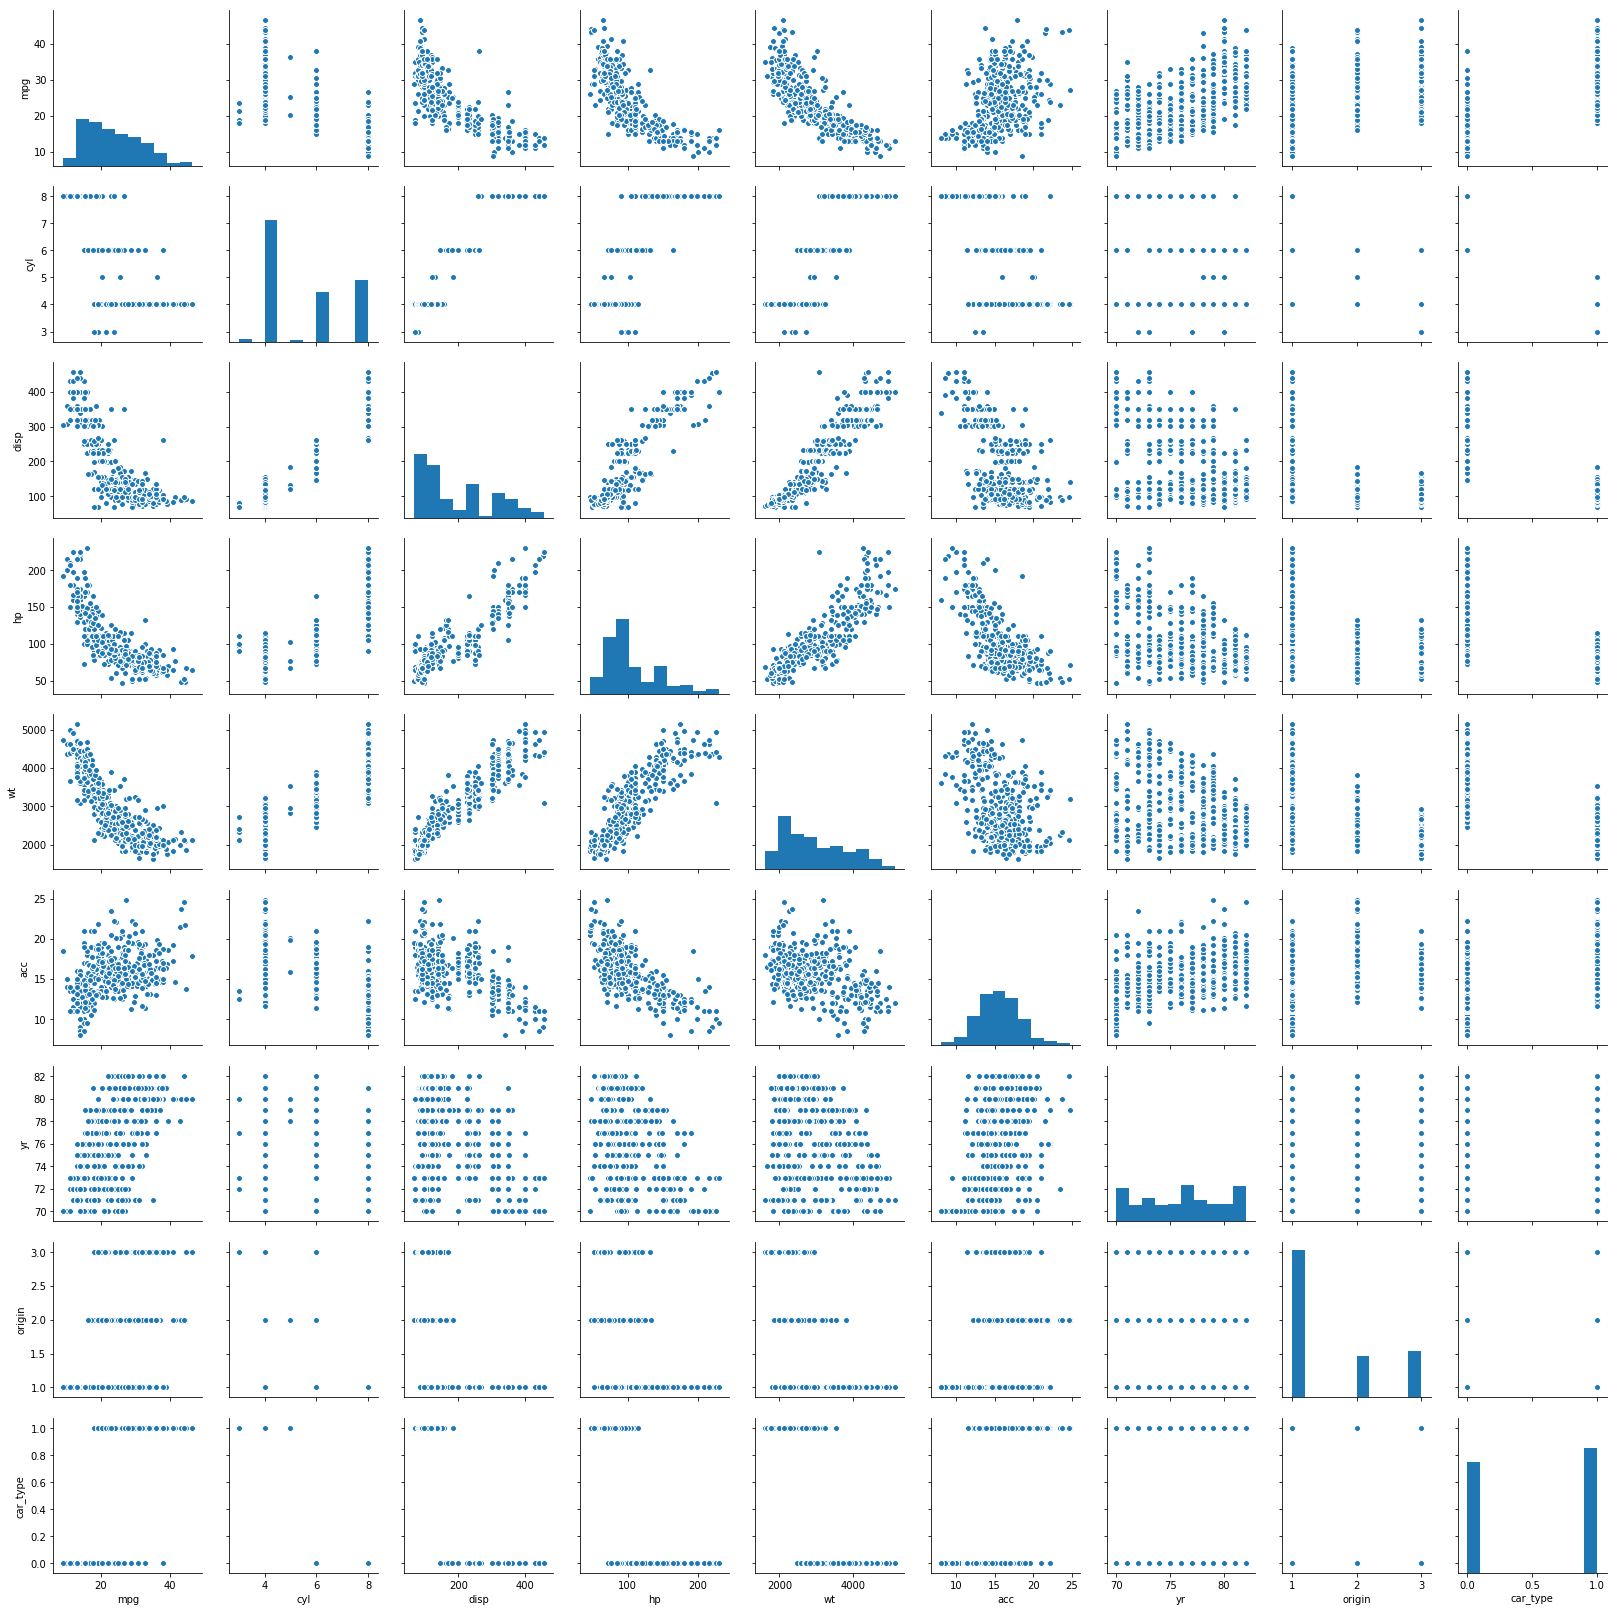

In [5]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

sns.pairplot(mpg_df) 
#sns.pairplot(mpg_df, diag_kind='kde') 

In [6]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)


Covariance Matrix 
%s [[ 1.00361011  0.95863099  0.8544826   0.89847166 -0.50494707 -0.35251336
  -0.535836  ]
 [ 0.95863099  1.00361011  0.89032763  0.93969096 -0.53318543 -0.35855376
  -0.59647546]
 [ 0.8544826   0.89032763  1.00361011  0.87229407 -0.67547967 -0.38096256
  -0.42185084]
 [ 0.89847166  0.93969096  0.87229407  1.00361011 -0.4159673  -0.29284492
  -0.56612671]
 [-0.50494707 -0.53318543 -0.67547967 -0.4159673   1.00361011  0.26300053
   0.15359099]
 [-0.35251336 -0.35855376 -0.38096256 -0.29284492  0.26300053  1.00361011
   0.15624642]
 [-0.535836   -0.59647546 -0.42185084 -0.56612671  0.15359099  0.15624642
   1.00361011]]


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.44357824  0.07900982 -0.02691741  0.24271496  0.66393984 -0.44626719
  -0.31207398]
 [ 0.4569908   0.10082571 -0.02407234  0.14958322  0.23975239  0.82852096
   0.11878878]
 [ 0.43918489 -0.14452826 -0.17115388  0.11922906 -0.60639264  0.01210289
  -0.61225851]
 [ 0.43671984  0.18642103 -0.02382157  0.33039049 -0.33788799 -0.32198771
   0.66854563]
 [-0.29317179  0.52011461  0.48782082  0.57266874 -0.11670139  0.07748987
  -0.24080813]
 [-0.20696316  0.55707434 -0.8006579   0.04561345  0.00979575  0.02014004
  -0.05656147]
 [-0.28636816 -0.58915141 -0.29968756  0.68213693  0.07814846  0.06454257
   0.07414546]]

 Eigen Values 
%s [4.56596172 0.96986519 0.78907248 0.47360772 0.13259666 0.03002608
 0.06414091]


In [8]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(4.565961716554772, array([ 0.44357824,  0.4569908 ,  0.43918489,  0.43671984, -0.29317179,
       -0.20696316, -0.28636816])), (0.969865191641517, array([ 0.07900982,  0.10082571, -0.14452826,  0.18642103,  0.52011461,
        0.55707434, -0.58915141])), (0.7890724823394372, array([-0.02691741, -0.02407234, -0.17115388, -0.02382157,  0.48782082,
       -0.8006579 , -0.29968756])), (0.4736077157206359, array([0.24271496, 0.14958322, 0.11922906, 0.33039049, 0.57266874,
       0.04561345, 0.68213693])), (0.13259665939083487, array([ 0.66393984,  0.23975239, -0.60639264, -0.33788799, -0.11670139,
        0.00979575,  0.07814846])), (0.0641409090552954, array([-0.31207398,  0.11878878, -0.61225851,  0.66854563, -0.24080813,
       -0.05656147,  0.07414546])), (0.030026083420252824, array([-0.44626719,  0.82852096,  0.01210289, -0.32198771,  0.07748987,
        0.02014004,  0.06454257]))]
Eigenvalues in descending order: 
[4.565961716554772, 0.969865191641517, 0.7890724823394372, 0.4736077

In [9]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%




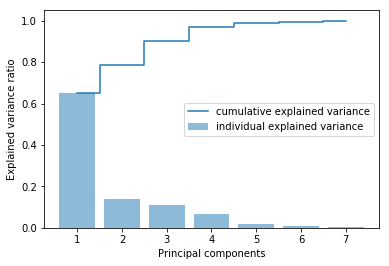

In [10]:
plt.bar(range(1,8), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [11]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [12]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y_train, test_size=test_size, random_state=seed)

C:\Users\Mukesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


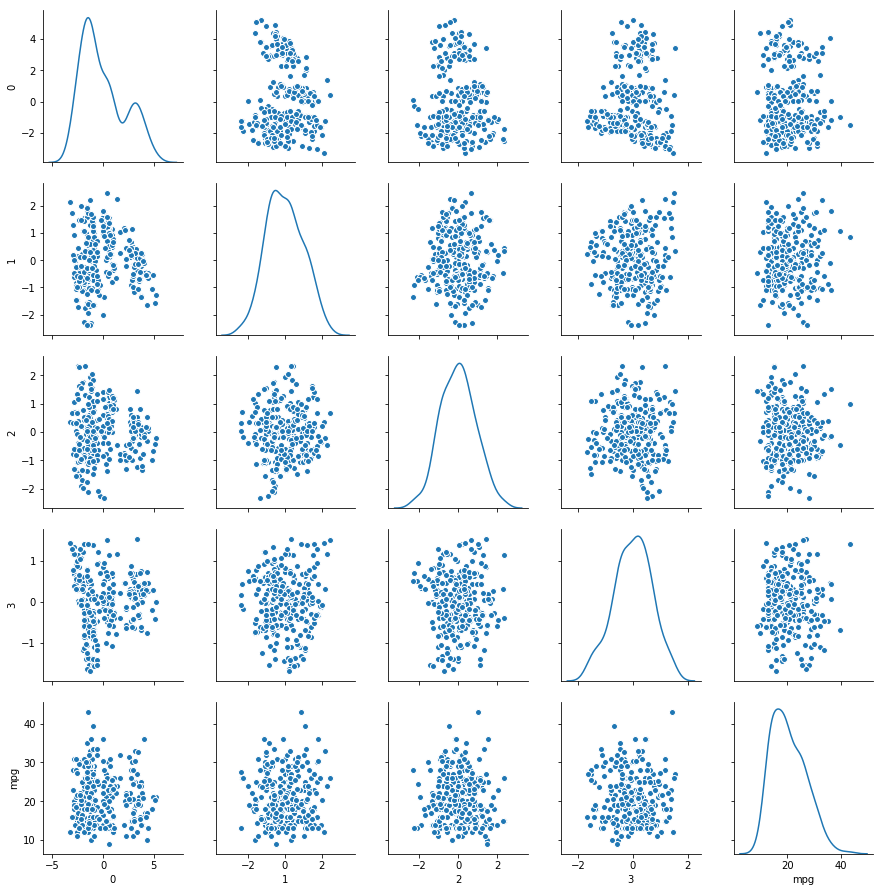

In [13]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

In [14]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-3.04823787,  0.27878612, -2.76078758, -1.06080193])

In [15]:
regression_model.intercept_

23.59616572730822

In [16]:
regression_model.score(X_test, y_test)

0.7420289751080937

In [17]:
# project the original test data into pc dimensions and check the performance

In [18]:
X_test_std =  sc.fit_transform(X_test_O) 


X_test_std_4D = np.dot(X_test_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_test_df = pd.DataFrame(X_test_std_4D)  # converting array to dataframe for pairplot


print(X_test_std.shape)
print(X_test_std_4D.shape)
print(Proj_test_df.shape)

(120, 7)
(120, 4)
(120, 4)


C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
regression_model.score(Proj_test_df, y_test_O)

0.8253768829939655